In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import folium
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap
from datetime import datetime


In [2]:
df_2022 = pd.read_csv('../datasets/acidentes2022.csv', encoding='latin1', sep=';')
df_2023 = pd.read_csv('../datasets/datatran2023.csv', encoding='latin1', sep=';')
df_2024 = pd.read_csv('../datasets/datatran2024.csv', encoding='latin1', sep=';')
df_2025 = pd.read_csv('../datasets/datatran2025.csv', encoding='latin1', sep=';')

In [3]:
df_2022.columns.difference(df_2023.columns)

Index(['ano_fabricacao_veiculo', 'estado_fisico', 'id_veiculo', 'idade',
       'marca', 'pesid', 'sexo', 'tipo_envolvido', 'tipo_veiculo'],
      dtype='object')

In [57]:
df_2023.columns.difference(df_2022.columns)

Index(['feridos', 'ignorados', 'pessoas', 'veiculos'], dtype='object')

In [58]:
df_2023.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

Como podemos ver, há algumas colunas que o dataframe de 2022 têm que os de 2023 adiante não têm. Porém, muitas informações são dados que seriam de saída, que não estamos interessados em predizer.

In [3]:
df_2022 = df_2022.drop(['ano_fabricacao_veiculo', 'estado_fisico', 'id_veiculo', 'idade',
              'marca', 'pesid', 'sexo', 'tipo_envolvido', 'tipo_veiculo', 'causa_acidente',
              'classificacao_acidente', 'fase_dia', 'sentido_via', 'tipo_pista',
              'tracado_via', 'uso_solo', 'regional', 'delegacia', 'uop'],
              axis=1)
df_2023 = df_2023.drop(['feridos', 'ignorados', 'pessoas', 'veiculos', 'causa_acidente', 'classificacao_acidente',
              'fase_dia', 'sentido_via', 'tipo_pista', 'tracado_via', 'uso_solo', 'regional', 'delegacia', 'uop'],
              axis=1)
df_2024 = df_2024.drop(['feridos', 'ignorados', 'pessoas', 'veiculos', 'causa_acidente', 'classificacao_acidente',
              'fase_dia', 'sentido_via', 'tipo_pista', 'tracado_via', 'uso_solo', 'regional', 'delegacia', 'uop'],
              axis=1)
df_2025 = df_2025.drop(['feridos', 'ignorados', 'pessoas', 'veiculos', 'causa_acidente', 'classificacao_acidente',
              'fase_dia', 'sentido_via', 'tipo_pista', 'tracado_via', 'uso_solo', 'regional', 'delegacia', 'uop'],
              axis=1)

In [5]:
df = pd.concat([df_2022, df_2023, df_2024, df_2025])
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'tipo_acidente', 'condicao_metereologica', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude'],
      dtype='object')

In [6]:
df

id data_inversa     dia_semana   horario  uf   br     km  \
0      405151.0   2022-01-01         sábado  01:35:00  PI  316    415   
1      405158.0   2022-01-01         sábado  02:40:00  PR  116     33   
2      405158.0   2022-01-01         sábado  02:40:00  PR  116     33   
3      405172.0   2022-01-01         sábado  05:22:00  MS  163    393   
4      405203.0   2022-01-01         sábado  07:00:00  RJ  101    457   
...         ...          ...            ...       ...  ..  ...    ...   
22494  691580.0   2025-04-30   quarta-feira  16:55:00  PR  116    117   
22495  691606.0   2025-04-07  segunda-feira  06:55:00  PB  230    469   
22496  691678.0   2025-03-07    sexta-feira  12:40:00  RS  116    223   
22497  691791.0   2025-04-23   quarta-feira  07:50:00  PR  376  602,5   
22498  691875.0   2025-04-27        domingo  05:00:00  MG  251    483   

                   municipio              tipo_acidente  \
0                MARCOLANDIA           Colisão traseira   
1      CAMPINA GRANDE DO SUL                 Tombamento   
2      CAMPINA GRANDE DO SUL                 Tombamento   
3       NOVA ALVORADA DO SUL           Colisão traseira   
4             ANGRA DOS REIS            Colisão frontal   
...                      ...                        ...   
22494               CURITIBA           Colisão traseira   
22495                  SOUSA        Colisão transversal   
22496            DOIS IRMAOS            Colisão frontal   
22497               CURITIBA           Colisão traseira   
22498           FRANCISCO SA  Saída de leito carroçável   

      condicao_metereologica  ilesos  feridos_leves  feridos_graves  mortos  \
0                    Nublado       1              0               0       0   
1                    Nublado       0              0               0       1   
2                    Nublado       0              1               0       0   
3                  Céu Claro       1              0               0       0   
4                      Chuva       1              0               0       0   
...                      ...     ...            ...             ...     ...   
22494              Céu Claro       2              1               0       0   
22495              Céu Claro       1              1               1       0   
22496              Céu Claro       0              1               1       0   
22497              Céu Claro       1              1               0       0   
22498              Céu Claro       0              3               0       0   

           latitude     longitude  
0       -7,43280012  -40,68261908  
1        -25,114403   -48,8467554  
2        -25,114403   -48,8467554  
3        -21,228445    -54,456296  
4      -23,03149804  -44,17715297  
...             ...           ...  
22494    -25,560317     -49,30772  
22495     -6,791722    -38,288207  
22496    -29,586668    -51,098856  
22497  -25,52314427  -49,33240978  
22498    -16,479532   -43,5047512  

[334246 rows x 16 columns]

### Análise exploratória de dados


In [62]:
print(df.shape)
print(df.info())


(334246, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 334246 entries, 0 to 22498
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      334246 non-null  float64
 1   data_inversa            334246 non-null  object 
 2   dia_semana              334246 non-null  object 
 3   horario                 334246 non-null  object 
 4   uf                      334246 non-null  object 
 5   br                      334246 non-null  int64  
 6   km                      334246 non-null  object 
 7   municipio               334246 non-null  object 
 8   tipo_acidente           334246 non-null  object 
 9   condicao_metereologica  334246 non-null  object 
 10  ilesos                  334246 non-null  int64  
 11  feridos_leves           334246 non-null  int64  
 12  feridos_graves          334246 non-null  int64  
 13  mortos                  334246 non-null  int64  
 14  latitude     

In [63]:
print(df.describe())
print(df.isnull().sum())

                  id             br         ilesos  feridos_leves  \
count  334246.000000  334246.000000  334246.000000  334246.000000   
mean   521509.675461     211.326424       0.714946       0.594643   
std     77452.955672     129.596222       1.337556       0.888712   
min    405147.000000       0.000000       0.000000       0.000000   
25%    460980.000000     101.000000       0.000000       0.000000   
50%    496341.500000     163.000000       1.000000       0.000000   
75%    586440.750000     324.000000       1.000000       1.000000   
max    691875.000000     498.000000      78.000000      83.000000   

       feridos_graves         mortos  
count   334246.000000  334246.000000  
mean         0.190207       0.056865  
std          0.495993       0.276329  
min          0.000000       0.000000  
25%          0.000000       0.000000  
50%          0.000000       0.000000  
75%          0.000000       0.000000  
max         35.000000      37.000000  
id                        0

In [64]:
df.select_dtypes(include='object').nunique()

data_inversa                1216
dia_semana                     7
horario                     1439
uf                            27
km                          9206
municipio                   1985
tipo_acidente                 17
condicao_metereologica        10
latitude                  112894
longitude                 112872
dtype: int64

In [65]:
df.isna().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
tipo_acidente             0
condicao_metereologica    0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
dtype: int64

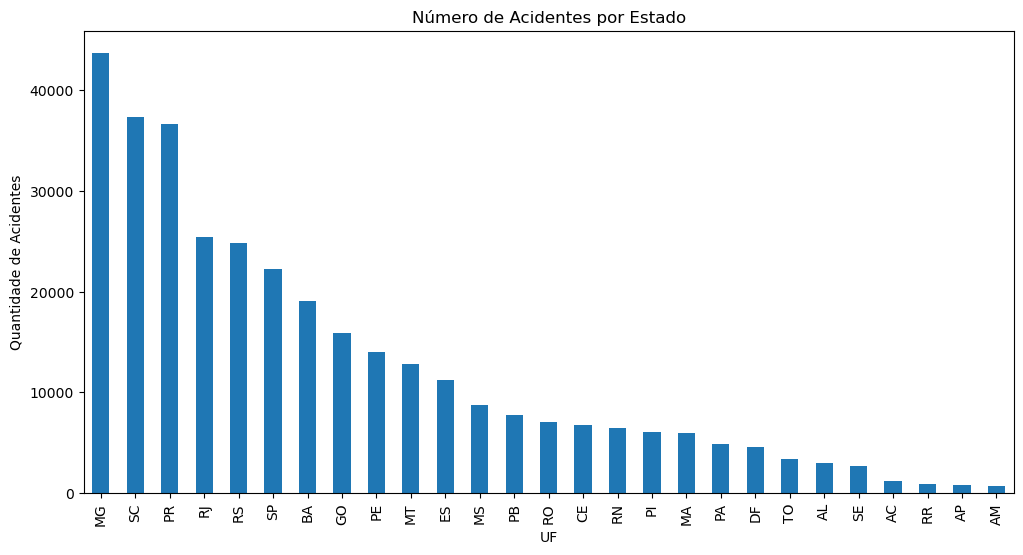

In [66]:
df['uf'].value_counts().plot(kind='bar', figsize=(12,6), title='Número de Acidentes por Estado')
plt.ylabel("Quantidade de Acidentes")
plt.xlabel("UF")
plt.show()

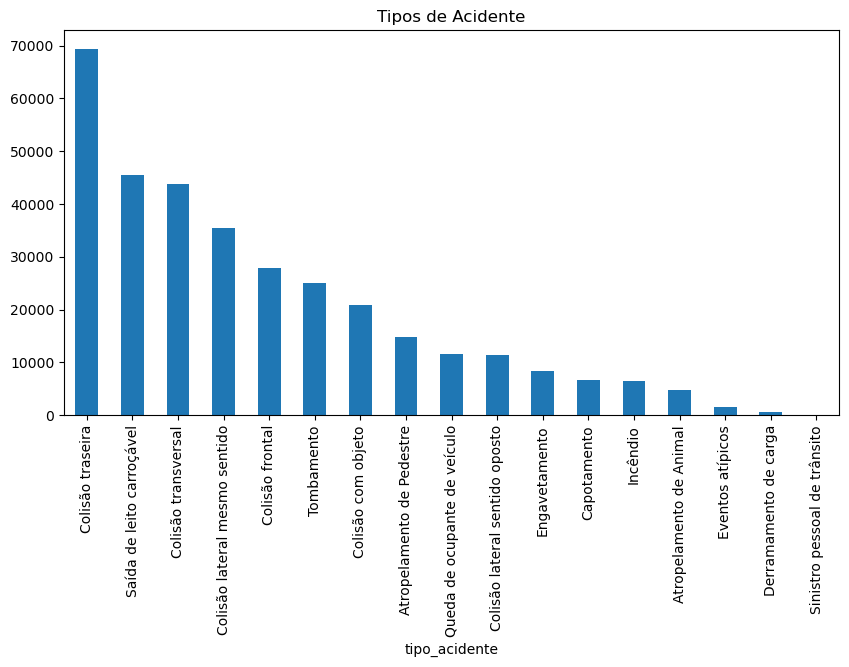

In [67]:
if 'tipo_acidente' in df.columns:
    df['tipo_acidente'].value_counts().plot(kind='bar', figsize=(10,5), title='Tipos de Acidente')
    plt.show()

/tmp/ipykernel_1002/2130801171.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['horario'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour


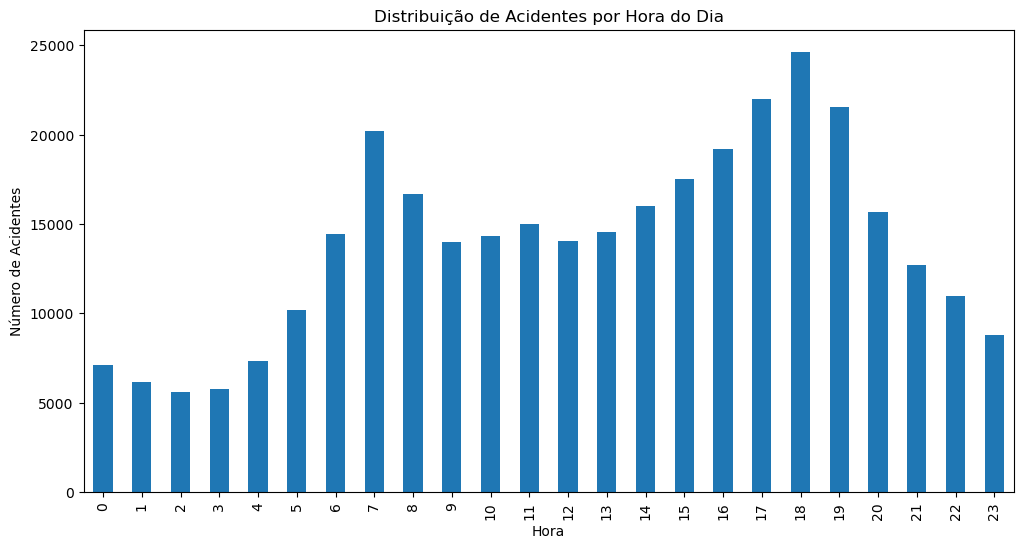

In [68]:
df['horario'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour
df['horario'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), title='Distribuição de Acidentes por Hora do Dia')
plt.xlabel("Hora")
plt.ylabel("Número de Acidentes")
plt.show()

In [12]:
import folium
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap
from datetime import datetime


In [ ]:
df_map = df[['latitude', 'longitude', 'data_inversa']].dropna().copy()
df_map['latitude'] = df_map['latitude'].str.replace(',', '.', regex=False)
df_map['longitude'] = df_map['longitude'].str.replace(',', '.', regex=False)
df_map['latitude'] = pd.to_numeric(df_map['latitude'], errors='coerce')
df_map['longitude'] = pd.to_numeric(df_map['longitude'], errors='coerce')
df_map['data_inversa'] = pd.to_datetime(df_map['data_inversa'], errors='coerce')
df_map = df_map.dropna(subset=['latitude', 'longitude', 'data_inversa'])
df_map['data_str'] = df_map['data_inversa'].dt.strftime('%Y-%m-%d')
data_grouped = df_map.groupby('data_str')[['latitude', 'longitude']].apply(
    lambda x: x.values.tolist()
)


heat_data = data_grouped.tolist()

time_index = data_grouped.index.tolist()

m = folium.Map(location=[-15.78, -47.93], zoom_start=4, tiles='CartoDB positron')
HeatMapWithTime(
    heat_data,
    index=time_index,
    auto_play=True,
    max_opacity=0.6,
    radius=8
).add_to(m)


m.save('heatmap_temporal_acidentes.html')
m


In [ ]:
df_map = df[['latitude', 'longitude']].dropna().copy()
df_map['latitude'] = df_map['latitude'].str.replace(',', '.', regex=False)
df_map['longitude'] = df_map['longitude'].str.replace(',', '.', regex=False)
df_map['latitude'] = pd.to_numeric(df_map['latitude'], errors='coerce')
df_map['longitude'] = pd.to_numeric(df_map['longitude'], errors='coerce')
df_map = df_map.dropna(subset=['latitude', 'longitude'])

heat_data = df_map[['latitude', 'longitude']].values.tolist()

m = folium.Map(location=[-15.78, -47.93], zoom_start=4, tiles='CartoDB positron')


HeatMap(heat_data, radius=10,blur=0,min_opacity=0.3, max_zoom=13,  gradient={0.2: 'yellow', 0.4: 'orange', 0.6: 'red', 1: 'darkred'} ).add_to(m)

m.save('heatmap_acidentes.html')
m


In [72]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
acidentes_por_dia = df.groupby(df['data_inversa'].dt.date).size()

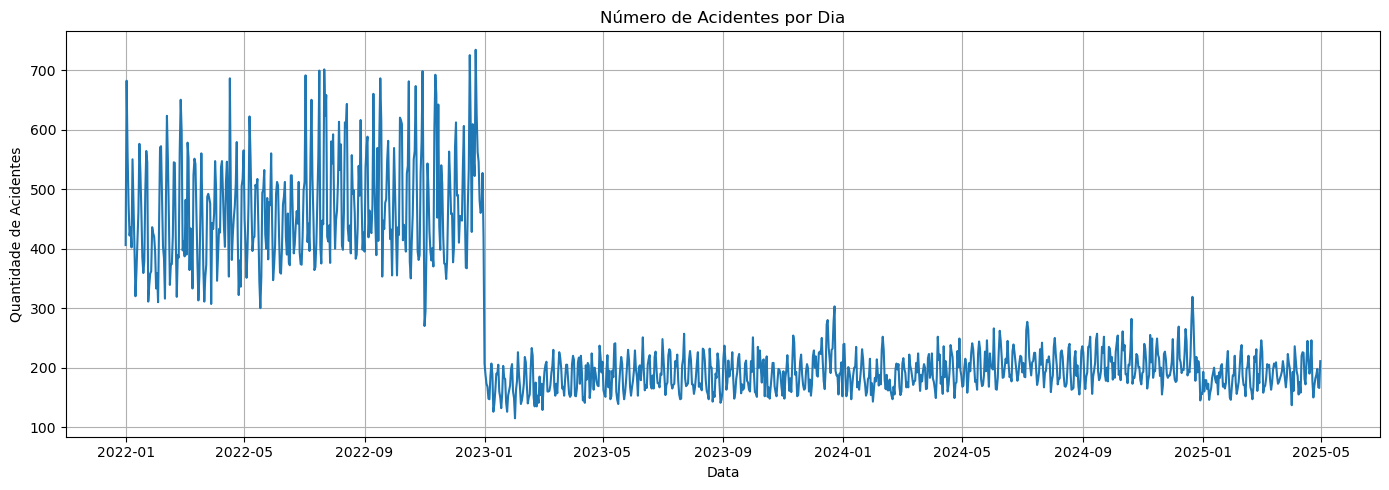

In [73]:
plt.figure(figsize=(14, 5))
acidentes_por_dia.plot()
plt.title('Número de Acidentes por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Acidentes')
plt.grid(True)
plt.tight_layout()
plt.show()

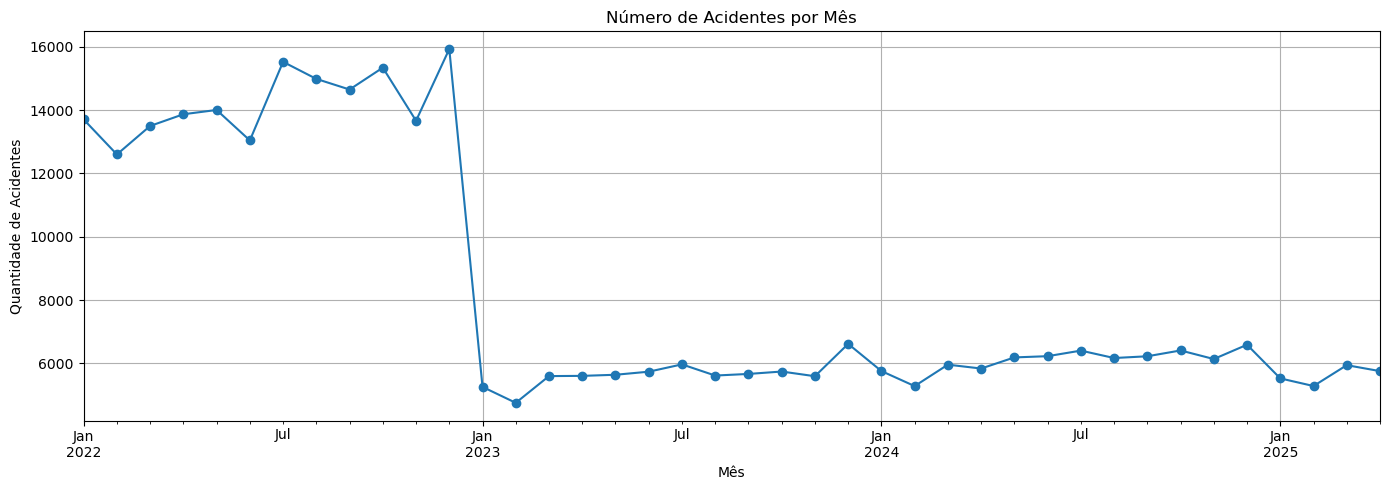

In [74]:
acidentes_por_mes = df.groupby(df['data_inversa'].dt.to_period('M')).size()
acidentes_por_mes.index = acidentes_por_mes.index.to_timestamp()
plt.figure(figsize=(14, 5))
acidentes_por_mes.plot(marker='o')
plt.title('Número de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.grid(True)
plt.tight_layout()
plt.show()

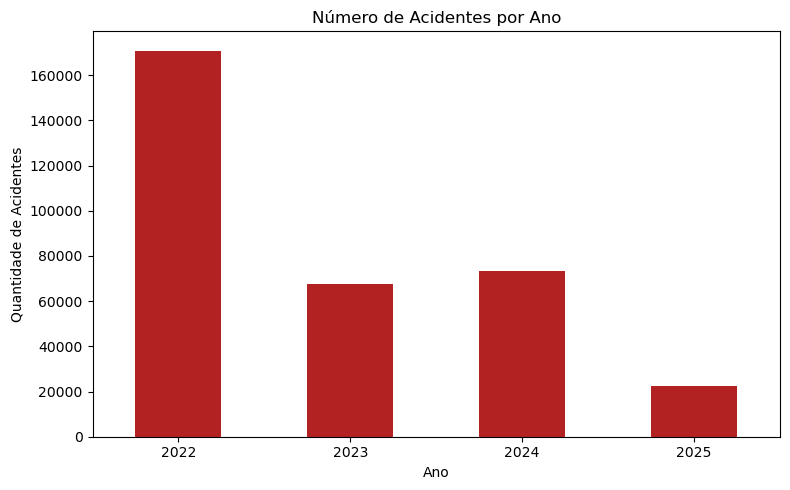

In [75]:
acidentes_por_ano = df.groupby(df['data_inversa'].dt.year).size()
plt.figure(figsize=(8, 5))
acidentes_por_ano.plot(kind='bar', color='firebrick')
plt.title('Número de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [76]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
acidentes_por_dia = df.groupby(df['data_inversa'].dt.date).size()
media_movel = acidentes_por_dia.rolling(window=7).mean() 

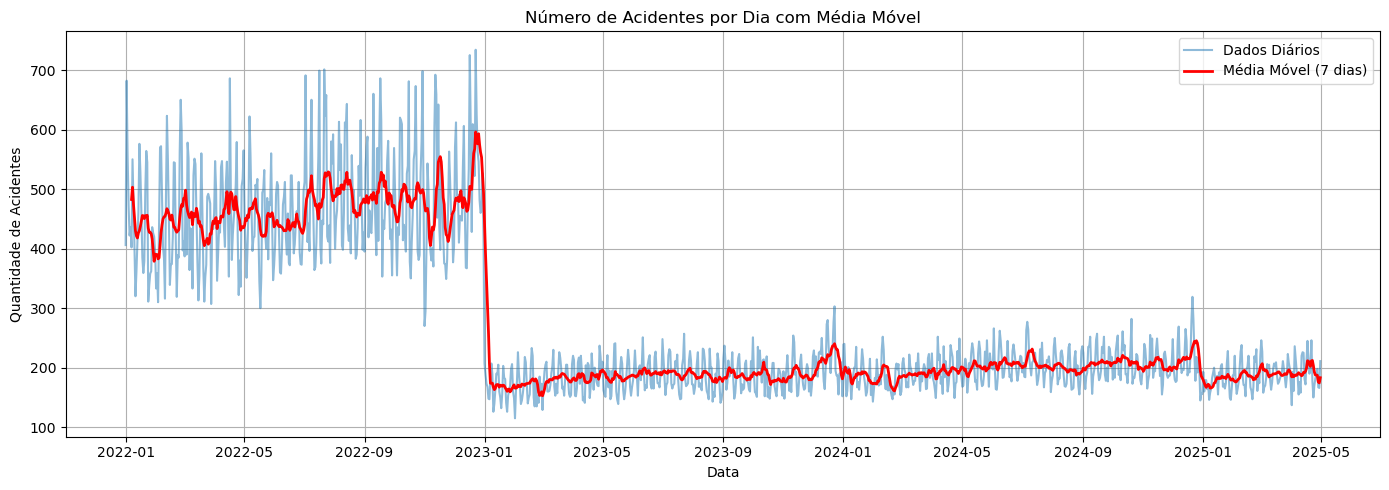

In [77]:
plt.figure(figsize=(14, 5))
plt.plot(acidentes_por_dia, label='Dados Diários', alpha=0.5)
plt.plot(media_movel, label='Média Móvel (7 dias)', linewidth=2, color='red')
plt.title('Número de Acidentes por Dia com Média Móvel')
plt.xlabel('Data')
plt.ylabel('Quantidade de Acidentes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Aplicação dos modelos de aprendizado de máquina


In [ ]:
# tive que fazer em uma célula só porque o pc não aguentou 
df_processed = df.copy()


colunas_coord = ['latitude', 'longitude']
for col in colunas_coord:
    df_processed[col] = df_processed[col].str.replace(',', '.').astype(float)


def padronizar_horario(h):
    h_str = str(h)
    if ':' in h_str:
        return h_str
    else:
        return h_str.zfill(2) + ':00:00'

df_processed['horario'] = df_processed['horario'].apply(padronizar_horario)

#  Conversão de colunas categóricas para numéricas 
colunas_categoricas = ['uf', 'condicao_metereologica', 'dia_semana']
df_processed = pd.get_dummies(df_processed, columns=colunas_categoricas, drop_first=True)


# Formato do horário estava ruim, então foi necessário fazer isso
df_processed['horario'] = pd.to_datetime(df_processed['horario'], format='%H:%M:%S').dt.time
segundos_no_dia = 24 * 60 * 60
segundos = df_processed['horario'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)

df_processed['horario_sin'] = np.sin(2 * np.pi * segundos / segundos_no_dia)
df_processed['horario_cos'] = np.cos(2 * np.pi * segundos / segundos_no_dia)

# b) (extrair o mês)
df_processed['mes'] = pd.to_datetime(df_processed['data_inversa']).dt.month
colunas_para_remover = [
    'id', 'data_inversa', 'horario', 'br', 'km', 'municipio',
    'tipo_acidente', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos'
]
df_final_features = df_processed.drop(columns=colunas_para_remover, errors='ignore')

print("Shape do DataFrame de features processado:", df_final_features.shape)
print("Pré-processamento concluído!")

X = df_final_features
y_classificacao = df['tipo_acidente']


RANDOM_STATE = 42

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_classificacao,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y_classificacao
)


clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

print("\nIniciando o treinamento do classificador...")
clf.fit(X_train_c, y_train_c)
print("Treinamento do classificador concluído!")

AttributeError: Can only use .str accessor with string values!

In [ ]:
print("Avaliando o modelo no conjunto de teste...")
y_pred_c = clf.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"\nAcurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test_c, y_pred_c))



Avaliando o modelo no conjunto de teste...

Acurácia do modelo: 0.5297

Relatório de Classificação:
                                precision    recall  f1-score   support

       Atropelamento de Animal       0.46      0.28      0.35      1208
     Atropelamento de Pedestre       0.55      0.47      0.51      3708
                   Capotamento       0.58      0.34      0.43      1644
            Colisão com objeto       0.47      0.35      0.40      5204
               Colisão frontal       0.63      0.61      0.62      6980
 Colisão lateral mesmo sentido       0.54      0.54      0.54      8877
Colisão lateral sentido oposto       0.70      0.58      0.64      2872
           Colisão transversal       0.53      0.60      0.56     10939
              Colisão traseira       0.52      0.66      0.58     17356
         Derramamento de carga       0.76      0.50      0.61       159
                 Engavetamento       0.77      0.65      0.71      2110
              Eventos atípicos     

In [ ]:
print("Iniciando pré-processamento...")
df_processed = df.copy()

colunas_coord = ['latitude', 'longitude']
for col in colunas_coord:
    df_processed[col] = df_processed[col].str.replace(',', '.').astype(float)


def padronizar_horario(h):
    h_str = str(h)
    if ':' in h_str:
        return h_str
    else:
        return h_str.zfill(2) + ':00:00'
df_processed['horario'] = df_processed['horario'].apply(padronizar_horario)


colunas_categoricas = ['uf', 'condicao_metereologica', 'dia_semana']
df_processed = pd.get_dummies(df_processed, columns=colunas_categoricas, drop_first=True)

df_processed['horario'] = pd.to_datetime(df_processed['horario'], format='%H:%M:%S').dt.time
segundos_no_dia = 24 * 60 * 60
segundos = df_processed['horario'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)
df_processed['horario_sin'] = np.sin(2 * np.pi * segundos / segundos_no_dia)
df_processed['horario_cos'] = np.cos(2 * np.pi * segundos / segundos_no_dia)
df_processed['mes'] = pd.to_datetime(df_processed['data_inversa']).dt.month

colunas_para_remover = [
    'id', 'data_inversa', 'horario', 'br', 'km', 'municipio',
    'tipo_acidente', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos'
]
df_final_features = df_processed.drop(columns=colunas_para_remover, errors='ignore')

print("Pré-processamento concluído!")

X = df_final_features
y_classificacao = df['tipo_acidente']
y_regressao = df[['mortos', 'feridos_graves', 'feridos_leves', 'ilesos']]



RANDOM_STATE = 42
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_classificacao, test_size=0.25, random_state=RANDOM_STATE, stratify=y_classificacao)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_regressao, test_size=0.25, random_state=RANDOM_STATE)



clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')
print("\nIniciando o treinamento do classificador...")
clf.fit(X_train_c, y_train_c)
print("Treinamento do classificador concluído!")



reg = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
print("\nIniciando o treinamento do regressor...")
reg.fit(X_train_r, y_train_r) 
print("Treinamento do regressor concluído!")

Iniciando pré-processamento...
Pré-processamento concluído!

Iniciando o treinamento do classificador...
Treinamento do classificador concluído!

Iniciando o treinamento do regressor...
Treinamento do regressor concluído!


In [43]:
y_pred_r = reg.predict(X_test_r)


mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

print(f"\nErro Médio Absoluto (MAE): {mae:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"\n(O MAE indica que, em média, as previsões do modelo para cada categoria de vítima - mortos, feridos, etc. - erram em aproximadamente {mae:.2f} pessoas.)")




Erro Médio Absoluto (MAE): 0.4203
Raiz do Erro Quadrático Médio (RMSE): 0.8942

(O MAE indica que, em média, as previsões do modelo para cada categoria de vítima - mortos, feridos, etc. - erram em aproximadamente 0.42 pessoas.)


In [33]:
df_predicoes_reg = X_test_r.copy()
df_predicoes_reg['mortos_prev'] = y_pred_r[:, 0]
df_predicoes_reg.dropna(subset=['latitude', 'longitude'], inplace=True)
df_predicoes_reg_filtrado = df_predicoes_reg[df_predicoes_reg['mortos_prev'] > 0.5].copy()
heat_data_pred_mortos = df_predicoes_reg_filtrado[['latitude', 'longitude', 'mortos_prev']].values.tolist()
mapa_pred_mortos = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heat_data_pred_mortos, radius=15).add_to(mapa_pred_mortos)
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Mapa de Calor das PREDIÇÕES de Vítimas Fatais</b></h3>
             '''
mapa_pred_mortos.get_root().html.add_child(folium.Element(title_html))


mapa_pred_mortos


In [ ]:
df_predicoes_reg = X_test_r.copy()
df_predicoes_reg['feridos_leves_prev'] = y_pred_r[:, 2]
df_predicoes_reg.dropna(subset=['latitude', 'longitude'], inplace=True)
df_predicoes_reg_filtrado = df_predicoes_reg[df_predicoes_reg['feridos_leves_prev'] > 0.5].copy()
heat_data_pred_leves = df_predicoes_reg_filtrado[['latitude', 'longitude', 'feridos_leves_prev']].values.tolist()
mapa_pred_leves = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heat_data_pred_leves, radius=15).add_to(mapa_pred_leves)
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Mapa de Calor das PREDIÇÕES de Feridos Leves</b></h3>
             '''
mapa_pred_leves.get_root().html.add_child(folium.Element(title_html))
mapa_pred_leves

In [ ]:

df_predicoes_reg = X_test_r.copy()
df_predicoes_reg['feridos_graves_prev'] = y_pred_r[:, 1]


df_predicoes_reg.dropna(subset=['latitude', 'longitude'], inplace=True)
df_predicoes_reg_filtrado = df_predicoes_reg[df_predicoes_reg['feridos_graves_prev'] > 0.5].copy()
heat_data_pred_graves = df_predicoes_reg_filtrado[['latitude', 'longitude', 'feridos_graves_prev']].values.tolist()
mapa_pred_graves = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heat_data_pred_graves, radius=15).add_to(mapa_pred_graves)
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Mapa de Calor das PREDIÇÕES de Feridos Graves</b></h3>
             '''
mapa_pred_graves.get_root().html.add_child(folium.Element(title_html))
mapa_pred_graves

In [ ]:
df_predicoes_reg = X_test_r.copy()
df_predicoes_reg['ilesos_prev'] = y_pred_r[:, 3]
df_predicoes_reg.dropna(subset=['latitude', 'longitude'], inplace=True)
df_predicoes_reg_filtrado = df_predicoes_reg[df_predicoes_reg['ilesos_prev'] > 0.5].copy()
heat_data_pred_ilesos = df_predicoes_reg_filtrado[['latitude', 'longitude', 'ilesos_prev']].values.tolist()
mapa_pred_ilesos = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heat_data_pred_ilesos, radius=15).add_to(mapa_pred_ilesos)


title_html = '''
             <h3 align="center" style="font-size:16px"><b>Mapa de Calor das PREDIÇÕES de Pessoas Ilesas</b></h3>
             '''
mapa_pred_ilesos.get_root().html.add_child(folium.Element(title_html))


mapa_pred_ilesos